#### <strong>第一次作品：主成分分析應用於群組資料之探討</strong>
學號：。。。

姓名：。。。
<hr>

 <font color=skyblue>作品目標</font>：。。。。。。 用一段文字描述你的作品目標。。。。。。
<hr>


<font color=red>提醒（只是提醒寫作的方式，無須置入作品中）</font>：每個題目的結構如下：
1. 描述題目（markdown）
1. 說明接下來的程式碼做些甚麼？（markdown）
1. 程式碼（code）
1. 程式執行結果（jupyter output）
1. 對結果的觀察與討論（markdown）

一個題目可能分好幾個細項執行，因此上述步驟 2 到步驟 5 將重複出現。以下舉例：

<hr>

第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

(1) 匯入與觀察資料

In [39]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset from sklearn
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# print sample size and number of features
print(f"Sample size: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y)}")
# print number of missing values
print(f"Number of missing values: {X.isnull().sum().sum()}")
X.head()
# X.info()
# X.describe()

Sample size: 178
Number of features: 13
Number of classes: 3
Number of samples per class: [59 71 48]
Number of missing values: 0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<hr>

(2) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

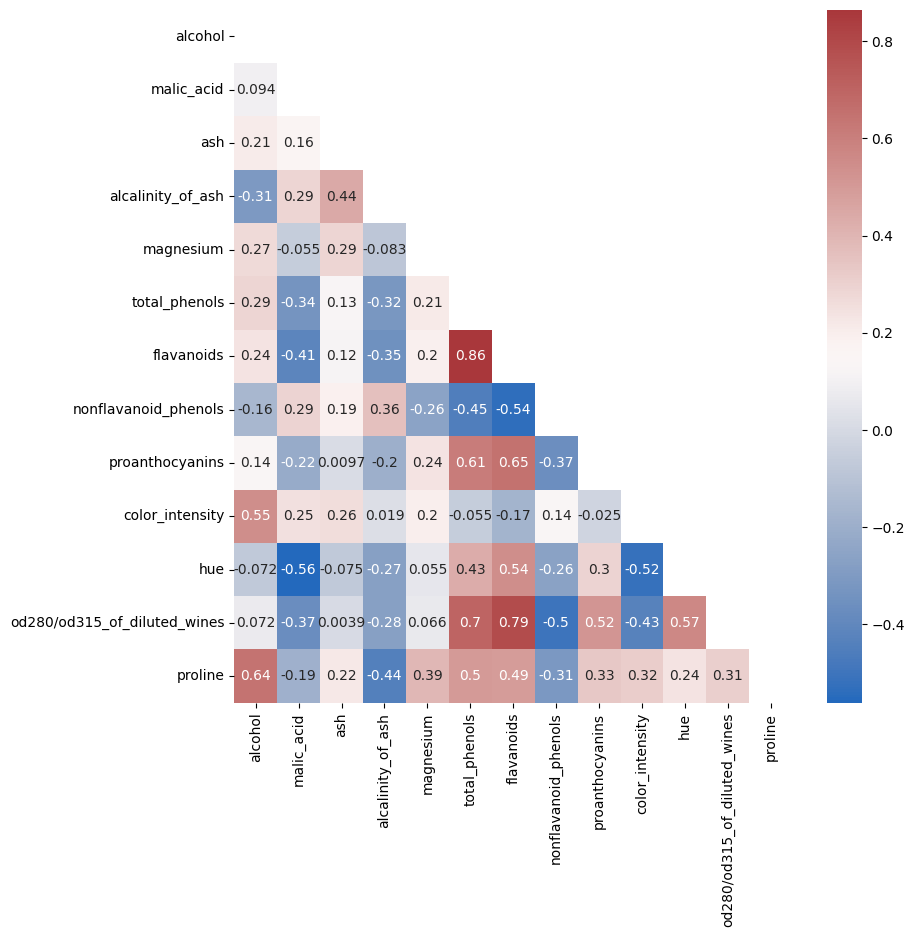

In [2]:
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 多組變數之間的相關係數較高，顯示這些變數具有高度相關性。

<hr>

(3) 繪製含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

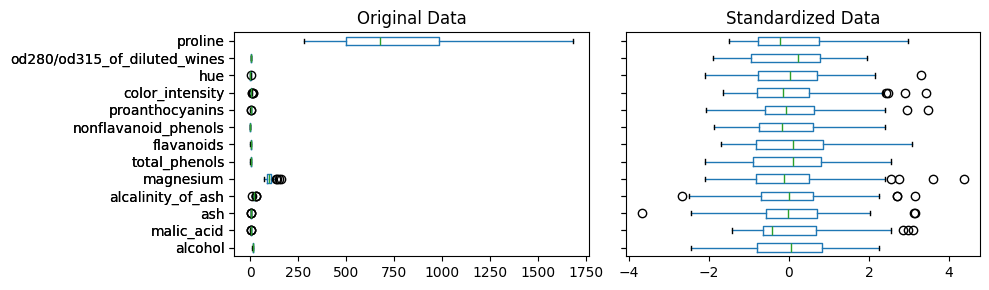

In [20]:
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 創建共享 Y 軸的子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# 繪製原始數據的盒鬚圖
X.boxplot(vert=False, ax=ax1)
ax1.set_title("Original Data")
ax1.grid(False)

# 繪製標準化後的盒鬚圖
X_standardized.boxplot(vert=False, ax=ax2)
ax2.set_title("Standardized Data")
ax2.grid(False)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 原始資料中各變數的尺度差異過大，將變數進行標準化後，可以使變數間的尺度一致，具體表現為平均值為 0，變異數為 1。

<hr>

(4) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

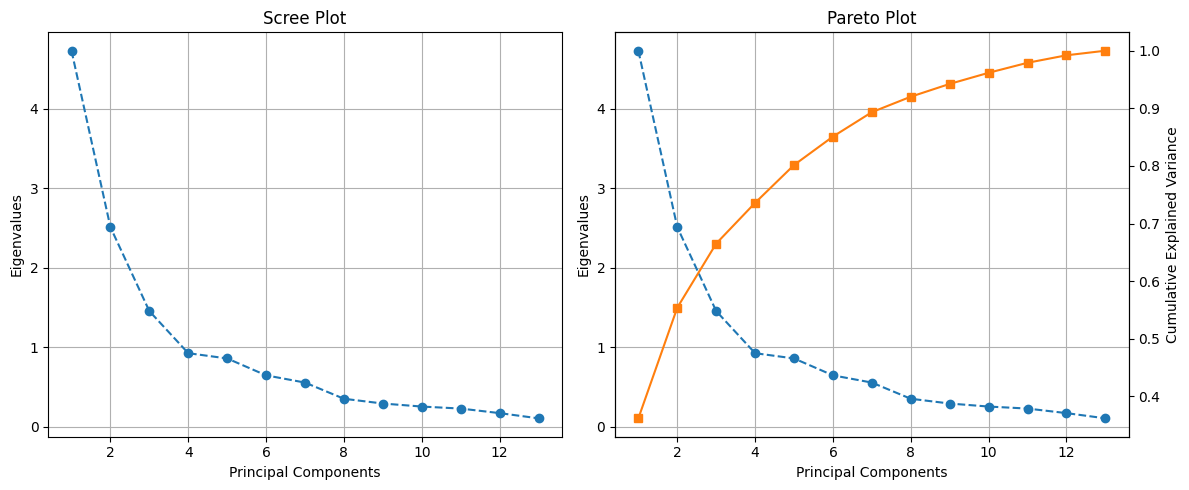

In [34]:
# PCA
from sklearn.decomposition import PCA

# 使用標準化數據 X_standardized

# 執行 PCA
pca = PCA()
pca.fit(X_standardized)

# 取得特徵值並按由大到小排序
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# 計算累積解釋變異數
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 創建子圖，並設置為 1 行 2 列的佈局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# **Scree Plot** - 顯示特徵值
ax1.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Eigenvalues')
ax1.grid(True)

# **Pareto Plot** - 顯示累積解釋變異數與特徵值
ax2.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4', label='Eigenvalues')  # 特徵值
ax2.set_title('Pareto Plot')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Eigenvalues')
ax2.grid(True)

# 創建第二個 y 軸來顯示累積解釋變異數
ax2_twin = ax2.twinx()
ax2_twin.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='s', linestyle='-', color='#ff7f0e', label='Cumulative Explained Variance')  # 累積解釋變異數
ax2_twin.set_ylabel('Cumulative Explained Variance')

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在四個主成分時，解釋變異數達到了約75%，而第五個主成分對解釋變異數的貢獻有限。
- 根據 肘部法則，我們通常會選擇四個主成分，因為它已經解釋了大部分的變異，並且進一步增加主成分對解釋變異的貢獻不大。

<hr>

(5) 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？

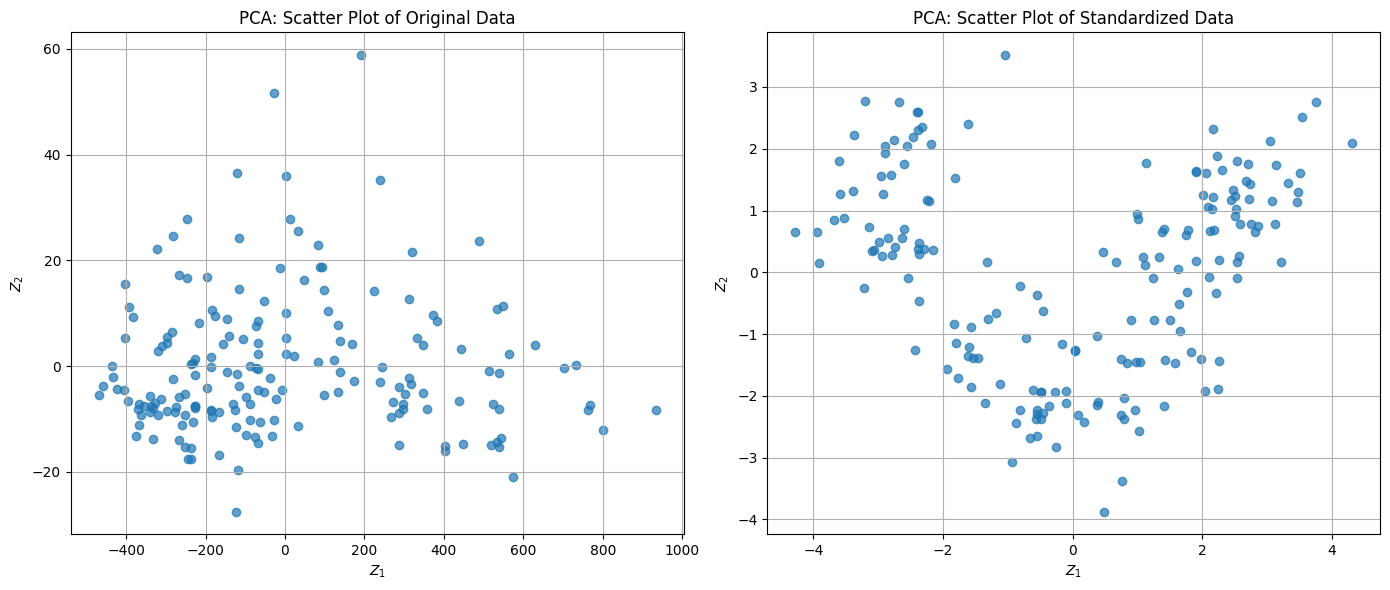

In [55]:
# 執行 PCA，選擇前兩個主成分

# **未標準化資料**
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=2)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# **左圖：未標準化資料的散布圖，根據 Y 來區分顏色**
scatter1 = ax1.scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)

# **右圖：標準化資料的散布圖，根據 Y 來區分顏色**
scatter2 = ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖的分布可以看出兩個群組，而右圖的分布則顯示出三個群組，這顯示標準化後的資料能夠更清楚地揭示出資料中的群體結構。

<hr>

(6) 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

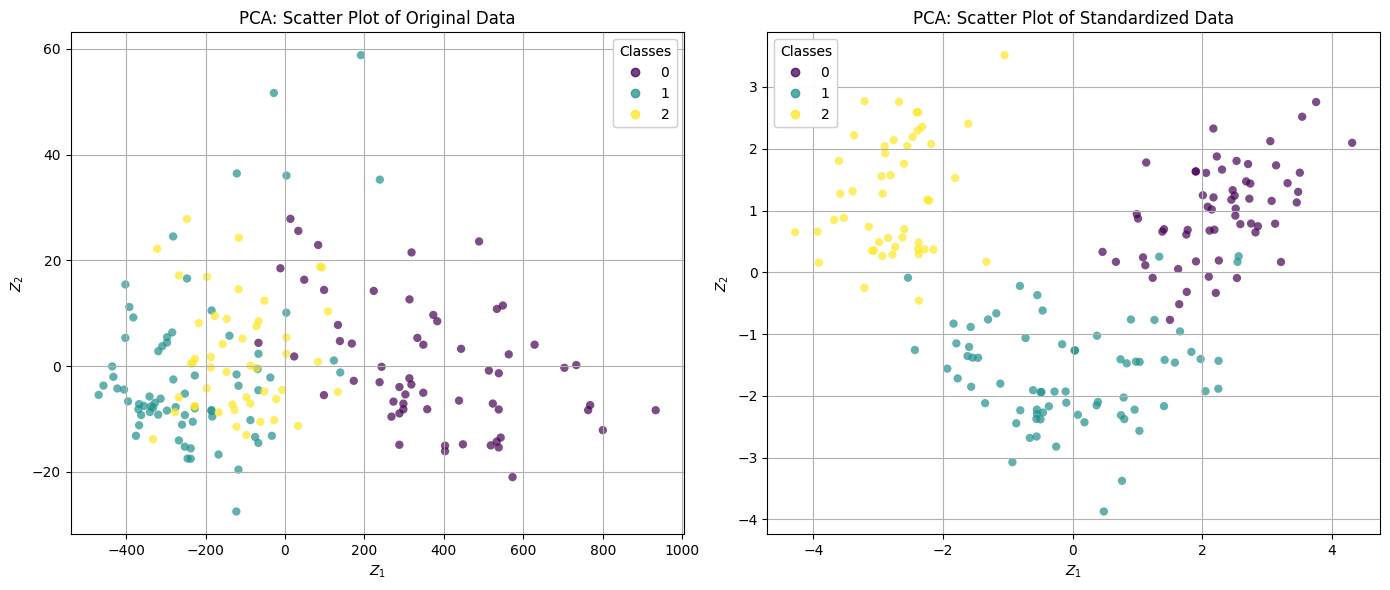

In [56]:
# 執行 PCA，選擇前兩個主成分

# **未標準化資料**
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=2)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# **左圖：未標準化資料的散布圖，根據 Y 來區分顏色**
scatter1 = ax1.scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)
# 顯示圖例
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

# **右圖：標準化資料的散布圖，根據 Y 來區分顏色**
scatter2 = ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)
# 顯示圖例
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖中類別1和類別2的區分不明顯，而右圖中各類別的資料點則有較明顯的區分，呈現出明確的群組結構，這顯示標準化後的資料有助於提升分群效果。

<hr>

(7) 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

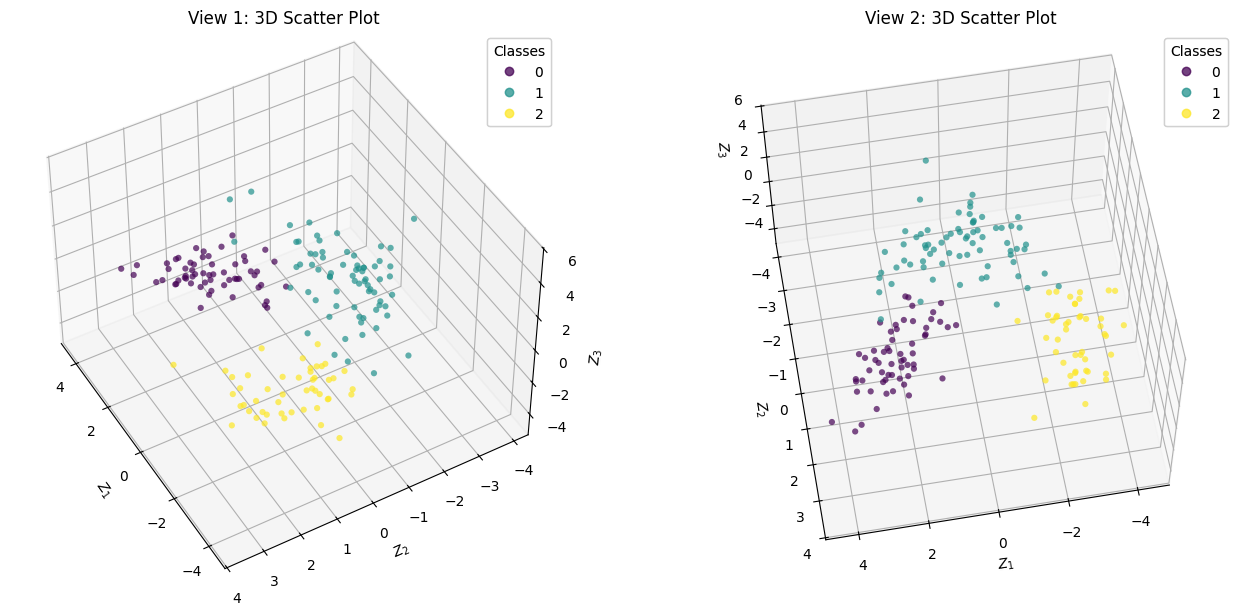

In [111]:
# 執行 PCA，選擇前兩個主成分

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=3)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖
fig = plt.figure(figsize=(14, 6))

# **左圖：第一個視角**
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], X_pca_standardized[:, 2], marker='o', c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax1.set_title('View 1: 3D Scatter Plot')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.set_zlabel('$Z_3$')
ax1.view_init(elev=45, azim=150)  # 設定左圖的視角
# 顯示圖例
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

# **右圖：第二個視角**
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], X_pca_standardized[:, 2], marker='o', c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax2.set_title('View 2: 3D Scatter Plot')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.set_zlabel('$Z_3$')
ax2.view_init(elev=60, azim=80)  # 設定右圖的視角
# 顯示圖例
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在兩張圖的視角下，顯示取三個主成分能有效區分三個類別的資料點，
- 使用兩個主成分時類別0和類別1部分重疊的問題，相對地，使用三個主成分改善此問題。

<hr>

(8) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

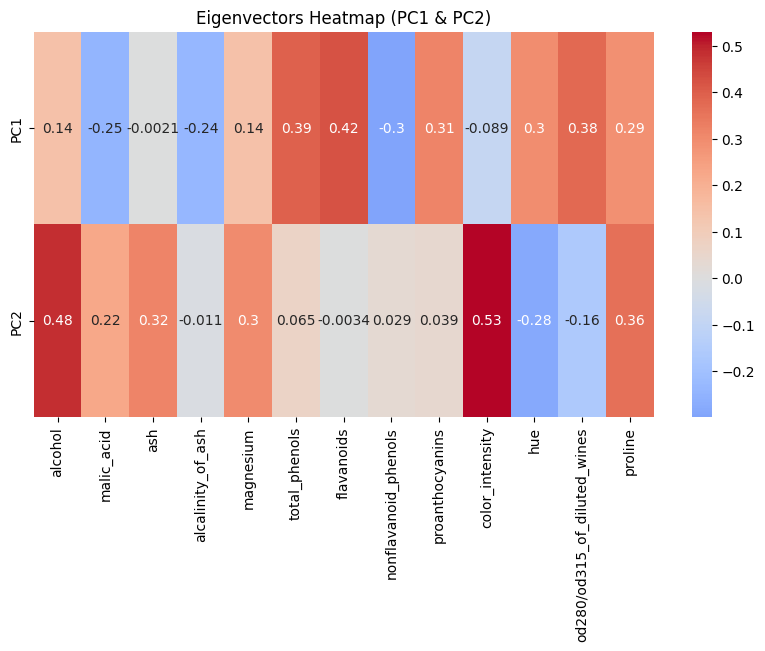

In [123]:
import seaborn as sns

# 假設 pca_components 是 PCA 取得的特徵向量 (eigenvectors)
pca_components_df = pd.DataFrame(pca.components_[:2], columns=X.columns, index=['PC1', 'PC2'])

# 畫出 heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', center=0)
plt.title("Eigenvectors Heatmap (PC1 & PC2)")
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 透過 熱圖（heatmap），視覺化變數對各主成分的貢獻程度。數值大（正或負） 的變數對該主成分影響較大，數值接近 0 的變數則影響較小。
- 在第一主成分的特徵向量中，total_phenols、flavanoids 和 od280/od315_of_diluted_wines 的數值較高，顯示這些變數對第一主成分影響較大；相對地，ash 和 color_intensity 的數值最低，表示其貢獻較小。
- 在第二主成分的特徵向量中，alcohol、flavanoids、color_intensity 和 proline 的數值較高，顯示這些變數對第二主成分的重要性較大；相對地，alcalinity_of_ash、flavanoids、nonflavanoid_phenols 和 proanthocyanins 的數值較低，表示其影響較小。

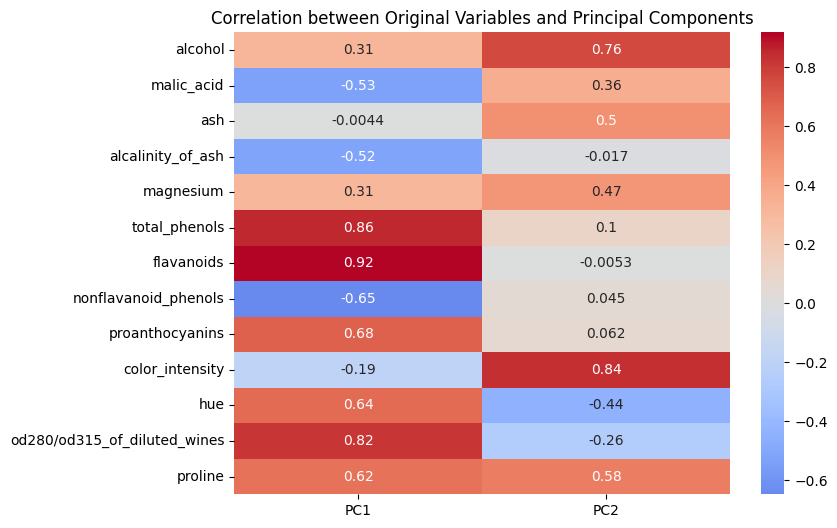

In [124]:
import numpy as np

# 計算原變數與主成分的相關係數
correlations = np.corrcoef(X_standardized.T, X_pca_standardized[:, :2].T)[:len(X.columns), len(X.columns):]

# 轉為 DataFrame 方便視覺化
correlation_df = pd.DataFrame(correlations, columns=['PC1', 'PC2'], index=X.columns)

# 繪製熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Original Variables and Principal Components")
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 若某變數的 eigenvector 係數很大，且與該主成分的相關係數也很高，則該變數在該主成分中扮演重要角色。
- 若某變數的 eigenvector 係數接近 0，且相關係數也很小，則該變數對該主成分影響較小。

<hr><hr>

第 2 題：

。。。。。。